In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier,plot_tree #Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
#load the dataset
df=pd.read_csv("Medicine_description.csv")
#head
df.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [3]:
#tail
df.tail()

,Drug_Name,Reason,Description
22476,T Muce Ointment 5gm,Wound,used for treating warts
22477,Wokadine 10% Solution 100mlWokadine Solution 5...,Wound,used to soften the skin cells
22478,Wokadine M Onit 10gm,Wound,used for scars
22479,Wound Fix Solution 100ml,Wound,used for wounds
22480,Wounsol Ointment 15gm,Wound,used to treat and remove raised warts (usually...


In [4]:
#Data Cleaning

#filling the missing descriptions with an emtpy string and reassigning to avoid chained assignment warning
df['Description'] = df['Description'].fillna('')

#remove duplicate rows based om "Drug_Name" and "Description" columns
df = df.drop_duplicates(subset=['Drug_Name', 'Description'], keep='first')

#drop rows with missing "Reason" (target) and reassign to avoid chained assignment warning
df = df. dropna(subset=['Reason'])


In [5]:
df.shape

(22481, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug_Name    22481 non-null  object
 1   Reason       22481 non-null  object
 2   Description  22481 non-null  object
dtypes: object(3)
memory usage: 527.0+ KB


In [7]:
# Encode the target variable (Reason) into numerical values
label_encoder = LabelEncoder()
df['Reason_encoded'] = label_encoder.fit_transform(df['Reason'])


In [8]:
# Features (X) and Target (y)
X = df['Description']  # Descriptions as input features
y = df['Reason_encoded']  # Encoded target labels


In [9]:
# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X)


In [10]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [11]:
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)


In [13]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}")


Decision Tree Model Accuracy: 98.78


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                   precision    recall  f1-score   support

             Acne       0.87      1.00      0.93        75
             Adhd       0.00      0.00      0.00         7
        Allergies       0.99      0.97      0.98       154
        Alzheimer       1.00      1.00      1.00        26
       Amoebiasis       1.00      0.43      0.60         7
          Anaemia       0.95      1.00      0.98        84
           Angina       1.00      1.00      1.00        68
          Anxiety       1.00      1.00      1.00       109
         Appetite       1.00      1.00      1.00         9
    Arrhythmiasis       1.00      1.00      1.00         3
        Arthritis       1.00      1.00      1.00        40
         Cleanser       1.00      1.00      1.00        10
     Constipation       1.00      1.00      1.00        62
    Contraception       1.00      1.00      1.00        27
         Dandruff       1.00      1.00      1.00        27
       Depression       1.00      1.00      1.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


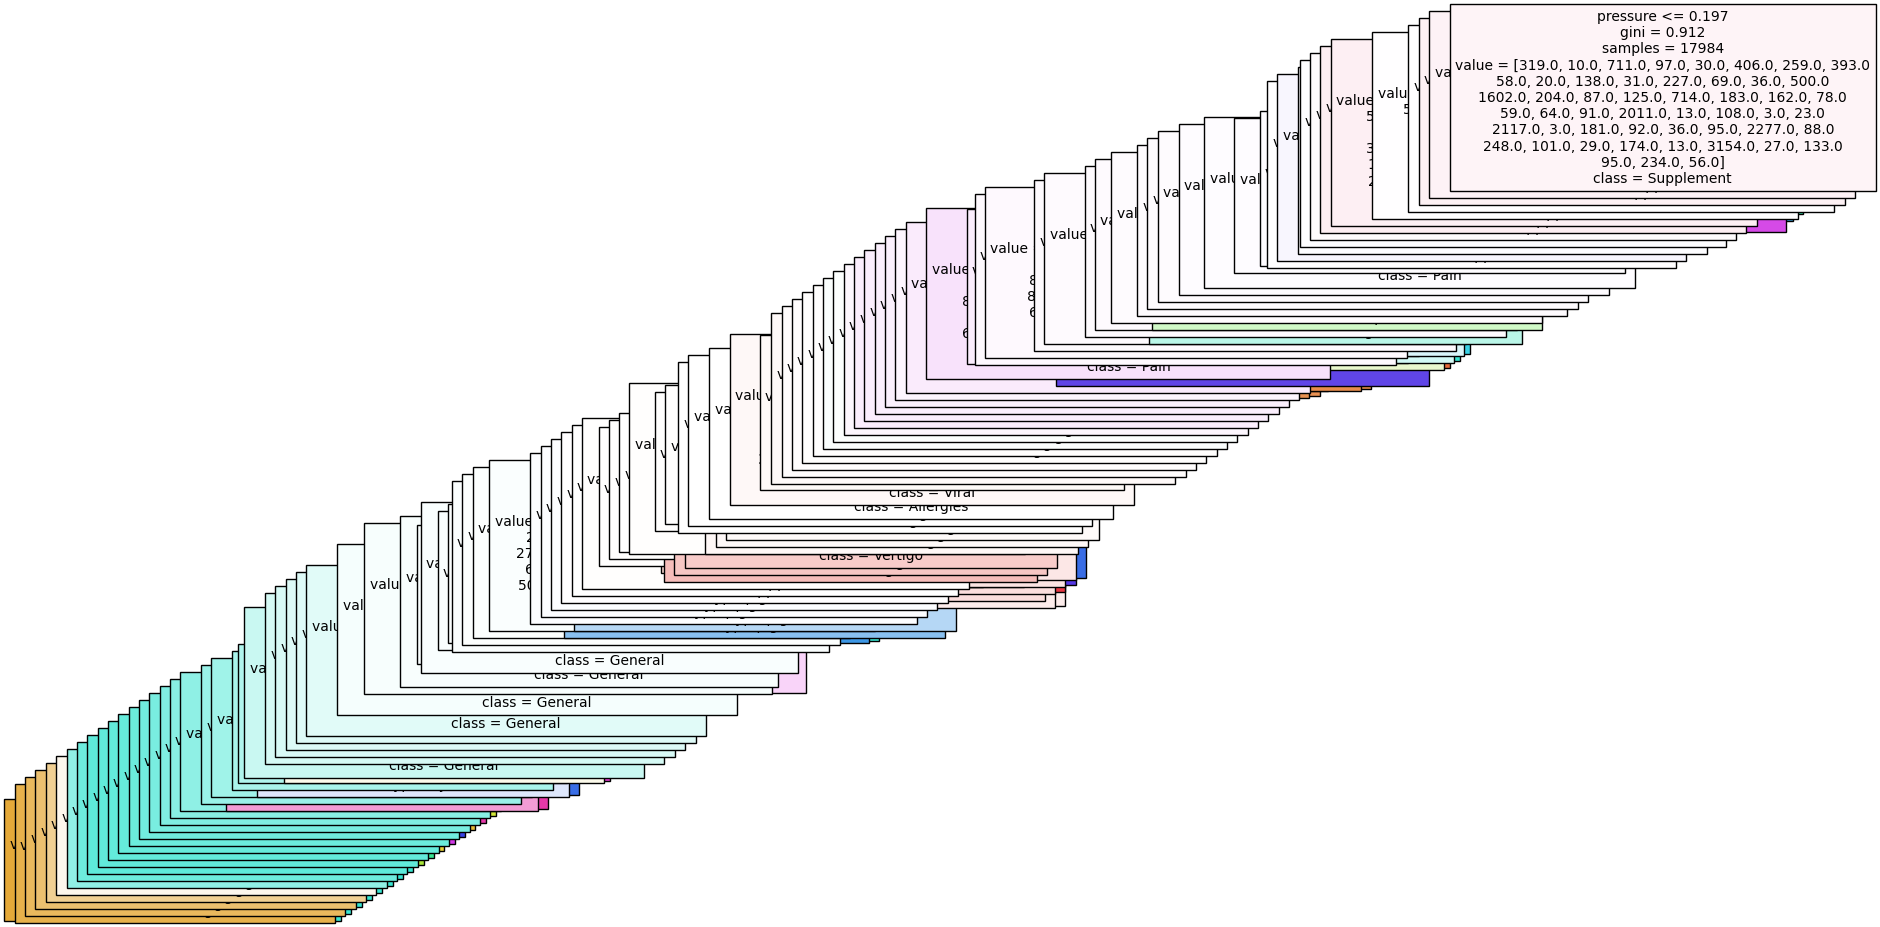

In [15]:
#visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=vectorizer.get_feature_names_out(), class_names=label_encoder.classes_, filled=True, fontsize=10)
plt.show()

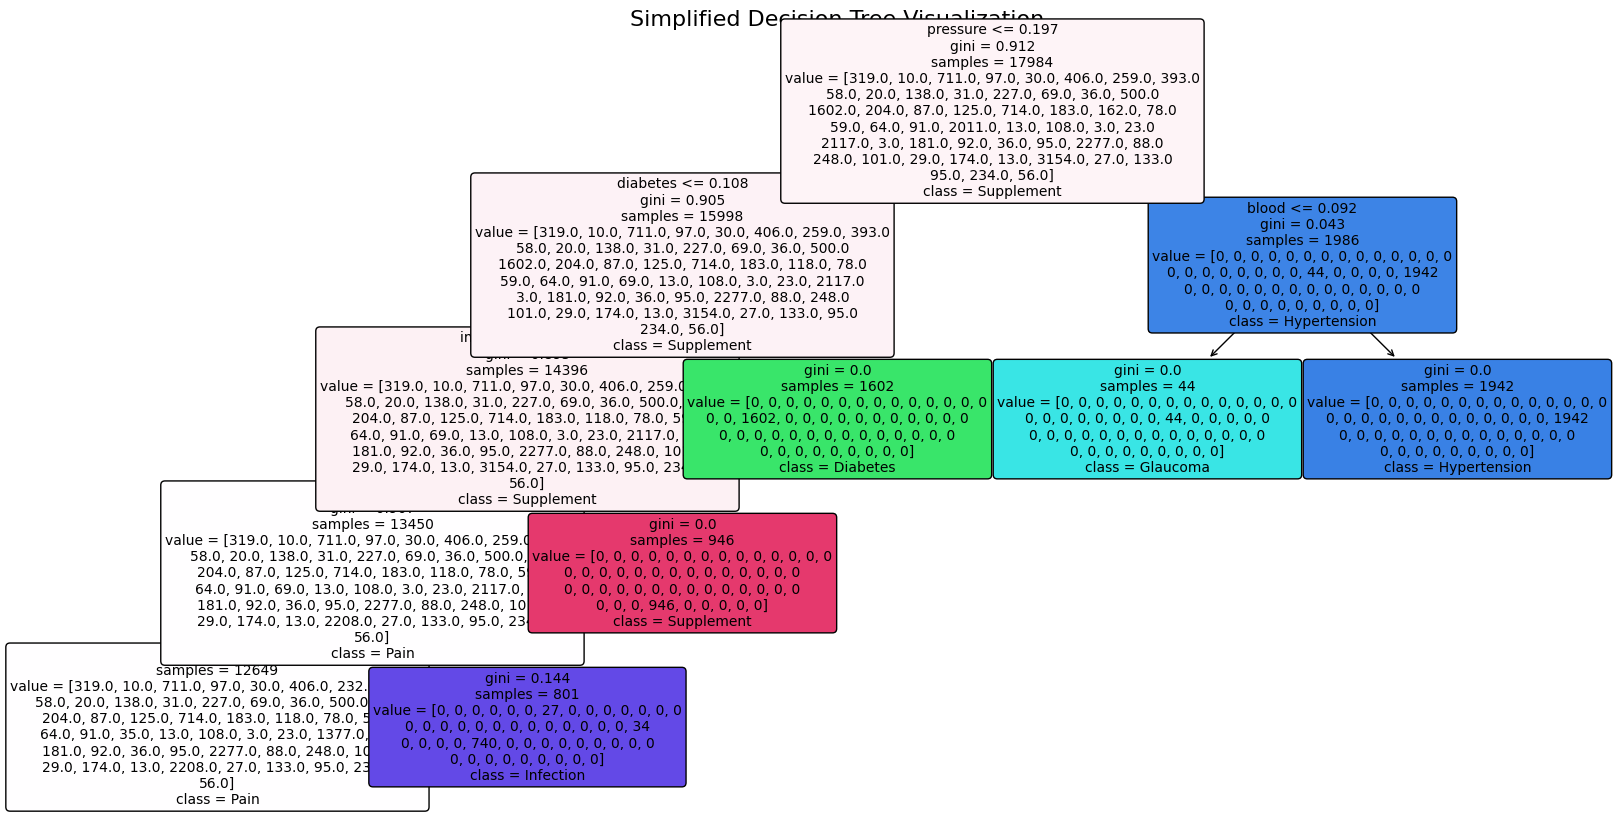

In [16]:
#training the Decision Tree with a limit on the depth
dt_model = DecisionTreeClassifier(
    max_depth=4,  # Limits the depth of the tree to make it more interpretable
    random_state=42
)
dt_model.fit(X_train, y_train)

# visualize the simplified Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=vectorizer.get_feature_names_out(),
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Simplified Decision Tree Visualization", fontsize=16)
plt.show()

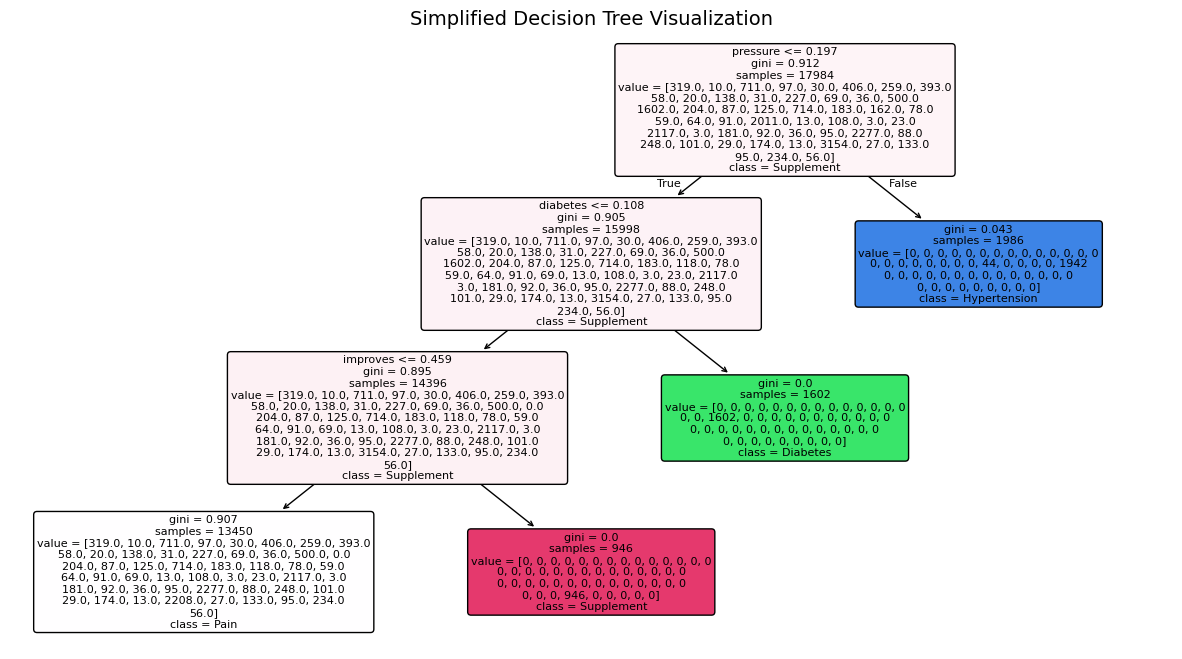

In [17]:
#training a simplified Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    ccp_alpha=0.01,
    random_state=42
)
dt_model.fit(X_train, y_train)

#ploting the simplified tree
plt.figure(figsize=(15, 8))
plot_tree(
    dt_model,
    feature_names=vectorizer.get_feature_names_out(),
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Simplified Decision Tree Visualization", fontsize=14)
plt.show()